## EX7.1 in Chapra book

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# lake parameter
Q = 1e5  # m^3/yr
V = 1e6  # m^3
z = 5    # m
k = 0.2  # 1/yr
v = 0.25 # m/yr
W = 50e6 # step loading, g/yr
c0 = 15  # initial concentration, mg/L

In [40]:
lamb = Q/V + k + v/z

In [41]:
def Euler(f, ci, h):
    c = ci + f * h
    return c

In [42]:
dt = 1 # time step, yr
t = np.arange(0,21,dt) # define the time
c = np.zeros(len(t))   # allocate concentration 
c[0] = c0              # assign the initial concentratioin to the first value

# update c from the second value
for count, ti in enumerate(t[1:]):
    c[count+1] = Euler((W/V - lamb*c[count]), c[count], dt)
    
c_analytical = c0*np.exp(-lamb*t) + W/(lamb*V)*(1-np.exp(-lamb*t))    

Text(0, 0.5, 'c (g/L)')

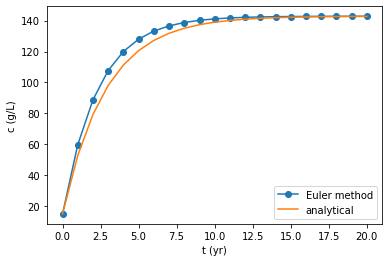

In [43]:
plt.plot(t,c,'o-',label='Euler method')
plt.plot(t,c_analytical, label='analytical')
plt.legend()
plt.xlabel('t (yr)')
plt.ylabel('c (g/L)')

Text(0, 0.5, 'c (g/L)')

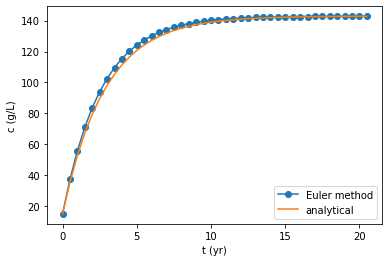

In [44]:
# Let's reduce time step
dt = 0.5
t = np.arange(0,21,dt) # define the time
c = np.zeros(len(t))   # allocate concentration 
c[0] = c0              # assign the initial concentratioin to the first value

for count, ti in enumerate(t[1:]):
    c[count+1] = Euler((W/V - lamb*c[count]), c[count], dt)

c_analytical = c0*np.exp(-lamb*t) + W/(lamb*V)*(1-np.exp(-lamb*t)) 

plt.plot(t,c,'o-',label='Euler method')
plt.plot(t,c_analytical, label='analytical')
plt.legend()
plt.xlabel('t (yr)')
plt.ylabel('c (g/L)')